<a href="https://colab.research.google.com/github/KorwinBieniek/StockPriceForecasting_StochasticModels/blob/main/StockPriceForecasting_StochasticModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Price Trend Prediction based on BTC data

In [ ]:
import requests
import pandas as pd

def get_crypto_price(symbol, exchange, start_date = None):
    api_key = 'YOUR API KEY'
    api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
    df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df

In [ ]:
btc = get_crypto_price(symbol = 'BTC', exchange = 'USD')
btc

,open,high,low,close,volume
2019-05-29,8716.87,8750.00,8406.60,8645.68,33880.865922
2019-05-30,8646.50,9074.26,8005.00,8269.54,70379.998521
2019-05-31,8267.10,8594.00,8108.50,8555.00,44727.491620
2019-06-01,8555.00,8626.00,8442.36,8544.07,31868.234157
2019-06-02,8545.10,8814.78,8524.00,8725.98,27835.133265
...,...,...,...,...,...
2022-02-17,43873.56,44164.71,40073.21,40515.70,47245.994940
2022-02-18,40515.71,40959.88,39450.00,39974.44,43845.922410
2022-02-19,39974.45,40444.32,39639.03,40079.17,18042.055100
2022-02-20,40079.17,40125.44,38000.00,38386.89,33439.290110


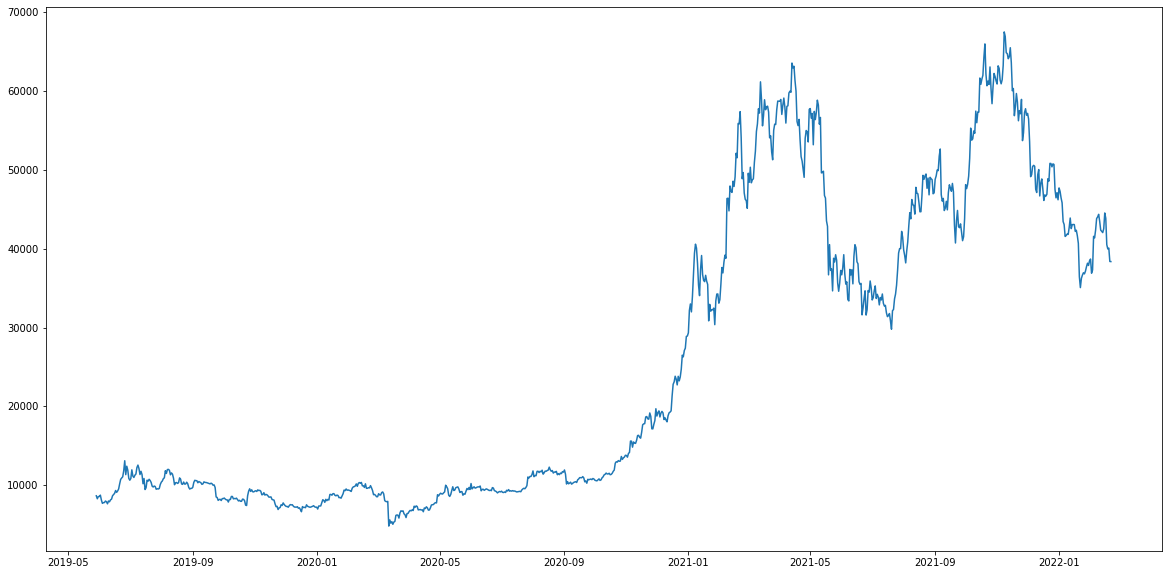

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x = plt.plot(btc.index, btc.close)

In [ ]:
mask_2022 = btc.index >= '2022-01'
y_test = btc[mask_2022]
y_test = y_test.close
X_train = btc[~mask_2022]
X_train = X_train.close
X_train

2019-05-29     8645.68
2019-05-30     8269.54
2019-05-31     8555.00
2019-06-01     8544.07
2019-06-02     8725.98
                ...   
2021-12-27    50701.44
2021-12-28    47543.74
2021-12-29    46464.66
2021-12-30    47120.87
2021-12-31    46216.93
Name: close, Length: 948, dtype: float64

In [ ]:
# ! pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# model = ARIMA(X_train, (1, 0, 0))
# model.fit()
# y_predict = model.predict((1000, 5))
# y_predict
# plt.figure(figsize=(20,10))
# x = plt.plot(btc.index, btc.close)
# y = plt.plot(X_train[1:].index, y_predict)
# plt.yscale('symlog')
# plt.show()

In [ ]:
# y_predict

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model_ = ARIMA(
    endog=X_train,
    order=(20, 0, 1)
    )
model_fit = model_.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
from datetime import datetime

In [ ]:
X_train.index

DatetimeIndex(['2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01',
               '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05',
               '2019-06-06', '2019-06-07',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=948, freq=None)

In [ ]:
y_predict = model_fit.predict(
    start=datetime(2019, 5, 29),
    end=datetime(2021, 12, 31)
)

In [ ]:
y_predict

2019-05-29    24643.674692
2019-05-30     8679.174787
2019-05-31     8320.807709
2019-06-01     8574.268352
2019-06-02     8569.850357
                  ...     
2021-12-27    50916.880470
2021-12-28    51107.189868
2021-12-29    47525.808062
2021-12-30    45983.494289
2021-12-31    47287.703523
Freq: D, Length: 948, dtype: float64

In [ ]:
y_predict_test = model_fit.predict(
    start=datetime(2022, 1, 1),
    end=datetime(2022, 2, 21)
)

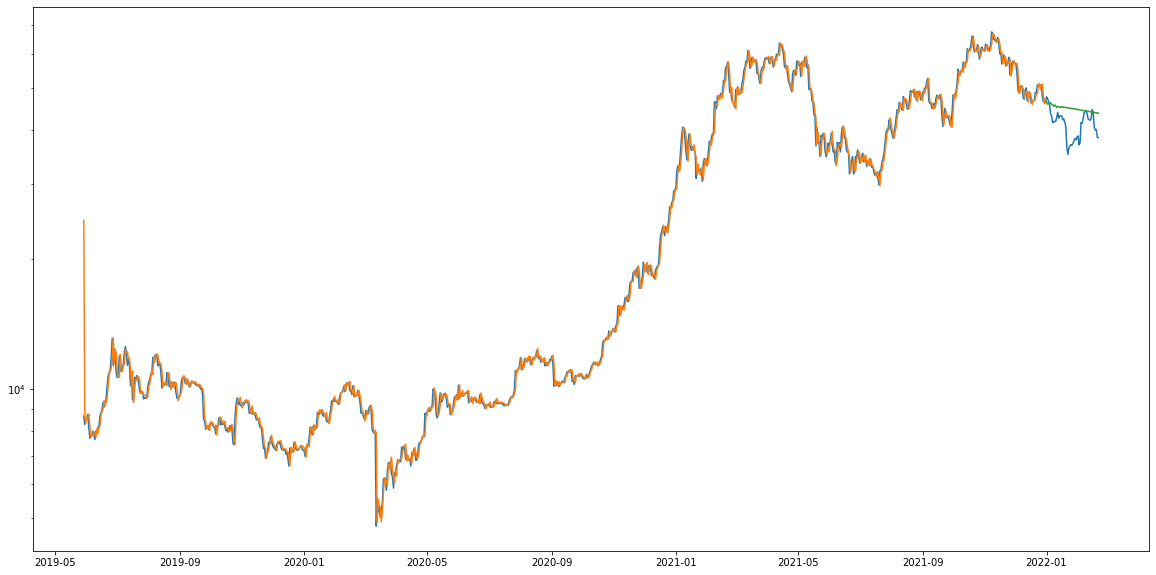

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(btc.index, btc.close, label='real')
plt.plot(X_train.index, y_predict, label='predicted')
plt.plot(y_test.index, y_predict_test, label='predicted TEST')

plt.yscale('log')
plt.show()

In [ ]:
model_.predict(X_train)

array([ 8.64568000e+03,  8.64568000e+03,  3.19960249e+04, -8.95900891e+06,
       -6.80625818e+06,  8.24791761e+06, -1.04575567e+07, -9.11590134e+06,
        4.69834364e+05, -1.51655128e+07, -1.71034645e+06, -3.57443015e+06,
       -1.43879263e+07, -3.25802971e+06, -2.04967018e+06, -1.22268566e+07,
        3.36716299e+06, -2.18386346e+05, -5.31019574e+06,  9.95814787e+06,
        5.93460038e+05,  4.18110049e+06,  7.82844175e+06,  8.06330179e+06,
        7.03988513e+06,  2.49234790e+07,  1.23405358e+07,  1.91648278e+07,
        3.39464546e+07,  2.82525509e+07,  2.66197003e+07,  3.31425678e+07,
        2.09878459e+07,  2.10417692e+07,  1.99873740e+07,  1.07190543e+07,
        3.40306013e+07,  2.01315790e+07,  1.27447719e+07,  2.89658254e+07,
        1.76713667e+07,  3.08193151e+07,  3.46898704e+07,  2.95947774e+07,
        1.66898397e+07,  3.35882649e+07,  1.57310468e+07,  1.23557289e+07,
        2.57848775e+07, -2.44258032e+06,  1.35340836e+07,  1.78588851e+07,
        9.51712199e+06,  